In [523]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [524]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [525]:
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [526]:
df.drop(["Cabin","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [527]:
df.dropna(subset=['Embarked'], inplace=True)

In [528]:
#removing nan value
df["Age"].fillna(df["Age"].median(),inplace=True)

In [529]:
#Encoding Categorical Data
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [531]:
x=df.drop(columns=['Survived'])
y=df["Survived"]
x.shape

(889, 7)

In [532]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [533]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer([
    ('tnf1',OneHotEncoder(sparse=False),['Sex']),
    ('tnf2',OneHotEncoder(sparse=False),['Embarked'])
],remainder='passthrough')

# ohe = OneHotEncoder(sparse=False,dtype=np.int32)
# X_tr= ohe.fit_transform(X_train[['Sex','Embarked']])
# X_tr2=df.drop(columns=["Sex","Embarked"],axis=1)
# X_tr=pd.DataFrame(X_tr)
# print(type(X_tr),type(X_tr2))
# X_train_t=pd.concat([X_tr,X_tr2],axis=1)
# X_train_t

In [534]:
X_train_t=transformer.fit_transform(X_train)
X_test_t=transformer.fit_transform(X_test)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_enc

In [535]:
df2=pd.DataFrame(X_train_t,columns=["male",'female','s','c','q','Pclass','Age','SibSp','Parch','Fare'])
df2_teset=pd.DataFrame(X_test_t,columns=["male",'female','s','c','q','Pclass','Age','SibSp','Parch','Fare'])

In [536]:
#with pandas
# df=pd.get_dummies(df,columns=['Embarked','Sex'],dtype=int)
# df

C:\Users\ABC\AppData\Local\Temp\ipykernel_13908\2869629418.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df2["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

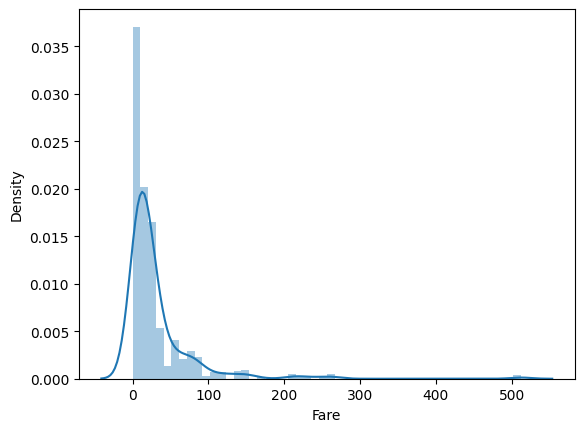

In [537]:
import seaborn as sas
sas.distplot(df2["Fare"])

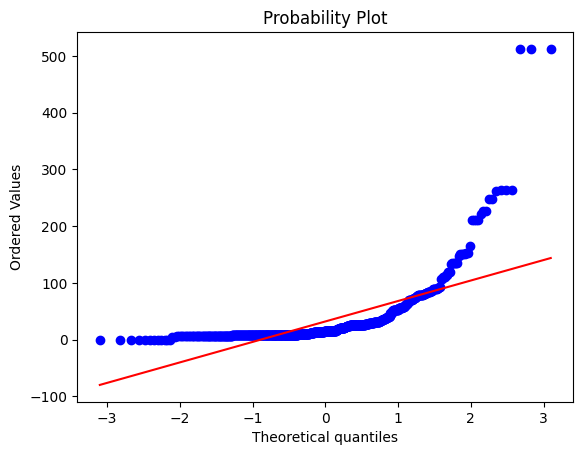

In [538]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df2["Fare"],dist="norm",plot=plt)
plt.show()

In [539]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [540]:
#function trnsfromer without columns transfer
# ft=FunctionTransformer(func=np.log1p)
# fear=ft.fit_transform(df2['Fare'])
# df2.drop(columns=["Fare"],axis=1,inplace=True)

In [541]:

# X_train_transformed = pd.concat([df2, fear], axis=1)

In [542]:
#function trnsfromer without columns transfer
transformers=ColumnTransformer([
    ("q1",FunctionTransformer(func=np.log1p),['Fare'])
    ],remainder="passthrough")

X_train_transformed=transformers.fit_transform(df2)
X_tset_transformed=transformers.fit_transform(df2_teset)


In [543]:
df3=pd.DataFrame(X_train_transformed,columns=['Fare',"male",'female','s','c','q','Pclass','Age','SibSp','Parch'])
df3

,Fare,male,female,s,c,q,Pclass,Age,SibSp,Parch
0,2.639057,0.0,1.0,0.0,0.0,1.0,2.0,25.0,0.0,0.0
1,4.051712,0.0,1.0,0.0,0.0,1.0,3.0,32.0,0.0,0.0
2,4.380150,1.0,0.0,0.0,0.0,1.0,1.0,26.0,0.0,0.0
3,2.803360,1.0,0.0,0.0,1.0,0.0,3.0,32.0,1.0,1.0
4,2.169054,0.0,1.0,0.0,1.0,0.0,3.0,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
706,3.056357,0.0,1.0,0.0,0.0,1.0,3.0,16.0,1.0,1.0
707,3.477773,1.0,0.0,0.0,0.0,1.0,3.0,5.0,4.0,2.0
708,2.107689,1.0,0.0,1.0,0.0,0.0,3.0,13.0,0.0,0.0
709,2.145931,0.0,1.0,0.0,0.0,1.0,3.0,28.0,0.0,0.0


C:\Users\ABC\AppData\Local\Temp\ipykernel_13908\2963307653.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df2["Fare"])


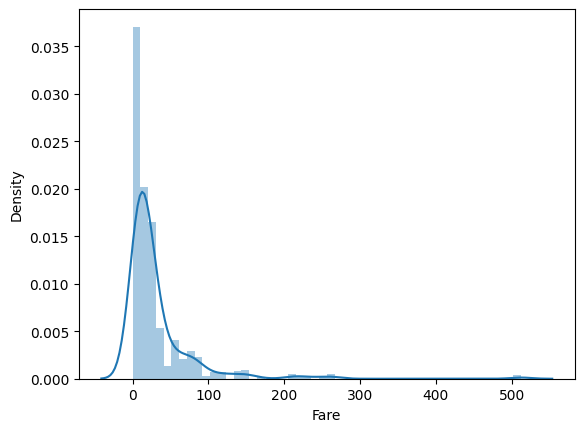

C:\Users\ABC\AppData\Local\Temp\ipykernel_13908\2963307653.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df3["Fare"])


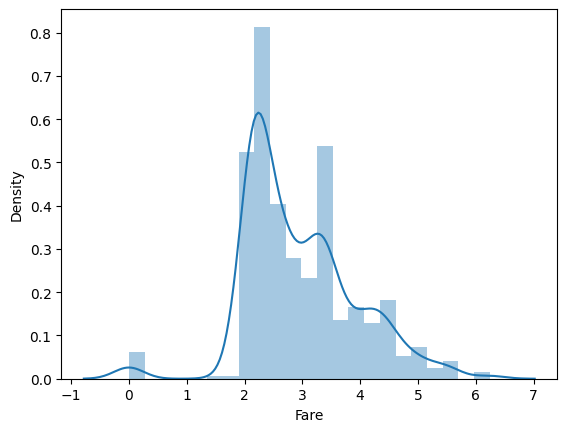

In [544]:

import matplotlib.pyplot as plt
import seaborn as sas
a=X_train_t
sas.distplot(df2["Fare"])
plt.show()


import seaborn as sas
a=X_train_t
sas.distplot(df3["Fare"])
plt.show()


In [545]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [546]:
model.fit(X_train_transformed,y_train)


c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [547]:
y_pred = model.predict(X_tset_transformed)

In [548]:
y_test

289    1
862    1
140    0
115    0
18     0
      ..
668    0
409    0
651    1
42     0
505    0
Name: Survived, Length: 178, dtype: int64

In [549]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.797752808988764

In [550]:
X_t=[[2.188856,0.0,1.0,0.0,0.0,1.0,3.0,39.0,0.0,0.0]]
x_p=model.predict(X_t)

if x_p==0:
    print("NO Survived")
else:
    print('Survived')



NO Survived
